In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime
import tensorflow as tf

warnings.filterwarnings("ignore")
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [309]:
df = pd.read_csv('clean_data.csv')
df.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.00,20.0,Blacktopped,98568.00,16,16435.354273
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.25,20.0,Blacktopped,7187.25,15,11130.821942
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.25,20.0,Blacktopped,55102.25,16,12031.109010
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.50,20.0,Blacktopped,7067.50,16,18394.057305
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.75,20.0,Blacktopped,13792.75,16,7250.185786


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       1687 non-null   object 
 1   City          1687 non-null   object 
 2   Price         1687 non-null   int64  
 3   Bedroom       1687 non-null   int64  
 4   Bathroom      1687 non-null   int64  
 5   Floors        1687 non-null   float64
 6   Parking       1687 non-null   int64  
 7   Face          1687 non-null   object 
 8   Year          1687 non-null   float64
 9   Area          1687 non-null   float64
 10  Road Width    1687 non-null   float64
 11  Road Type     1687 non-null   object 
 12  Build Area    1687 non-null   float64
 13  Amenities     1687 non-null   int64  
 14  Pricepersqft  1687 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 197.8+ KB


## Data Cleaning

In [311]:
null_counts = df.isnull().sum()
null_counts

Address         0
City            0
Price           0
Bedroom         0
Bathroom        0
Floors          0
Parking         0
Face            0
Year            0
Area            0
Road Width      0
Road Type       0
Build Area      0
Amenities       0
Pricepersqft    0
dtype: int64

In [312]:
df['Address'] = df['Address'].fillna(df['Address'].mode()[0])
df['Road Type'] = df['Road Type'].fillna(df['Road Type'].mode()[0])

In [313]:
X = df.drop('Price',axis=1)
y = df['Price']

In [314]:
X.head()

,Address,City,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
0,Budhanilkantha,Kathmandu,6,3,2.0,10,West,2073.0,5476.00,20.0,Blacktopped,98568.00,16,16435.354273
1,Budhanilkantha,Kathmandu,5,3,2.0,9,East,2073.0,7187.25,20.0,Blacktopped,7187.25,15,11130.821942
2,Dhapasi,Kathmandu,5,3,2.0,12,East,2071.0,5818.25,20.0,Blacktopped,55102.25,16,12031.109010
3,Baluwatar,Kathmandu,6,4,3.0,9,West,2017.0,7067.50,20.0,Blacktopped,7067.50,16,18394.057305
4,Golfutar,Kathmandu,6,3,2.0,10,East,2070.0,13792.75,20.0,Blacktopped,13792.75,16,7250.185786


In [315]:
y

0        90000000
1        80000000
2        70000000
3       130000000
4       100000000
          ...    
1682     59000000
1683      6500000
1684     12000000
1685     27000000
1686     72500000
Name: Price, Length: 1687, dtype: int64

## Data Visualization

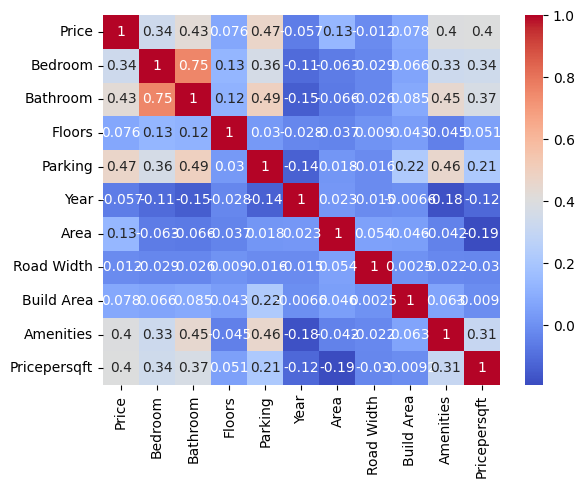

In [316]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [317]:
# # histogram plots
# fig, axs = plt.subplots(X_1.shape[1], figsize=(5, 40))

# for i, column in enumerate(X_1.columns):
#     axs[i].hist(X_1[column])
#     axs[i].set_title(column)

# plt.show()

In [318]:
# for col in X_1.columns:
#     if X_1[col].dtype != object:  # plot only numeric columns
#         fig, ax = plt.subplots()
#         ax.boxplot(X_1[col])
#         ax.set_title(col)
#         plt.show()

# Data preparation pipeline

In [319]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
t = [('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols), ('num', MinMaxScaler(), numeric_cols)]
col_transform = ColumnTransformer(transformers=t)
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Address', 'City', 'Face', 'Road Type'], dtype='object')),
                                ('num', MinMaxScaler(),
                                 Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Year', 'Area',
       'Road Width', 'Build Area', 'Amenities', 'Pricepersqft'],
      dtype='object'))])

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [321]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(y, y_hat):
    r2 = r2_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)
    return r2, mae, rmse, mse

## Training

In [322]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb = XGBRegressor()

xgb_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb)])
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print('xgb', evaluate_model(y_pred_xgb, y_test))
print(xgb_pipe.score(X_test, y_test))

xgb (0.6524284923528925, 3142249.361399634, 18501086.9229548, 342290217330729.1)
0.816698329466351


In [323]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# # define the XGBRegressor model
# xgb = XGBRegressor()

# # create the parameter grid
# param_grid = {
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__max_depth': [3, 5, 7],
#     'model__n_estimators': [50, 100, 200],
#     'model__alpha': [0,0.01,0.1,0.5,1,1.1]
# }

# # create the pipeline with preprocessor and model
# xgb_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb)])

# # create GridSearchCV object
# grid_search = GridSearchCV(xgb_pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# # fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # print the best hyperparameters and corresponding score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [324]:
# xgb_tuned = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5)

# xgb_tuned_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb_tuned)])
# xgb_tuned_pipe.fit(X_train, y_train)
# y_pred_xgb_tuned = xgb_tuned_pipe.predict(X_test)
# print('xgb_tuned', evaluate_model(y_pred_xgb_tuned, y_test))
# print(xgb_tuned_pipe.score(X_test, y_test))

In [329]:
xgb_tuned = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, reg_lambda=0.1)

xgb_tuned_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb_tuned)])
xgb_tuned_pipe.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned_pipe.predict(X_test)
print('xgb_tuned', evaluate_model(y_pred_xgb_tuned, y_test))
print(xgb_tuned_pipe.score(X_test, y_test))

xgb_tuned (0.6781201780640798, 3303170.945612981, 17864683.54412974, 319146918131900.0)
0.829091921774911


In [326]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_pipe = Pipeline(steps=[('perp', col_transform), ('model', rf)])
# rf_pipe.fit(X_train, y_train)
# y_pred_rf = rf_pipe.predict(X_test)
# print('rf', evaluate_model(y_pred_rf, y_test))
# print(rf_pipe.score)

In [327]:
# from sklearn.linear_model import ElasticNet
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pipe = Pipeline([
#     ('prep', col_transform),
#     ('model', ElasticNet())
# ])

# param_grid = {
#     'model__alpha': [0.01, 0.1, 1, 10],
#     'model__l1_ratio': [0.2, 0.5, 0.8]
# }

# grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


In [330]:
log_dir = "logs/fit/xgboost" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)

r2, mae, rmse, mse = evaluate_model(y_pred_xgb_tuned, y_test)
with tf.summary.create_file_writer(log_dir).as_default():
    tf.summary.scalar('r2', r2, step=1)
    tf.summary.scalar('mae', mae, step=1)
    tf.summary.scalar('rmse', rmse, step=1)
    tf.summary.scalar('mse', mse, step=1)
